In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**CARGA DE DATOS**
=====================

In [2]:
postulantesEducacion=pd.read_csv('/home/sherly/Escritorio/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv',low_memory=False)
postulantesGeneroYEdad=pd.read_csv('/home/sherly/Escritorio/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv',low_memory=False)
vistas=pd.read_csv('/home/sherly/Escritorio/datos_navent_fiuba/fiuba_3_vistas.csv',low_memory=False)
postulaciones=pd.read_csv('/home/sherly/Escritorio/datos_navent_fiuba/fiuba_4_postulaciones.csv',low_memory=False)
avisosOnline=pd.read_csv('/home/sherly/Escritorio/datos_navent_fiuba/fiuba_5_avisos_online.csv',low_memory=False)
avisosDetalle=pd.read_csv('/home/sherly/Escritorio/datos_navent_fiuba/fiuba_6_avisos_detalle.csv',low_memory=False)

** Merge entre los archivos:**
============================

** 1. Educacion, genero y edad de los postulantes**

In [3]:
postulantes = pd.merge(postulantesEducacion, postulantesGeneroYEdad, on='idpostulante', how='outer')
postulantes.tail()

,idpostulante,nombre,estado,fechanacimiento,sexo
310362,mzdNo99,NaN,NaN,1999-08-10,FEM
310363,Nzr1J34,NaN,NaN,NaN,NO_DECLARA
310364,JBrNMNk,NaN,NaN,1997-01-11,MASC
310365,2zP6Jd0,NaN,NaN,1997-03-06,FEM
310366,2zP6J9V,NaN,NaN,NaN,NO_DECLARA


**2. AvisosOnline y avisosDetalle, asi generan un solo archivo de avisos**

In [4]:
avisos = pd.merge(avisosOnline, avisosDetalle, on='idaviso', how='outer')
avisos.tail()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
13844,1112342204,1.0,Ejecutivo de Ventas - Prov. de Bs. As e Interi...,"<p>Editorial Rubinzal Culzoni, líder en el ámb...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Rubinzal Editorial
13845,1112341862,1.0,24 Feb - Chief Software Architect ($100K/yr) -...,<p>Para inscribirse en el torneo debe ingresar...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Jefe / Supervisor / Responsable,Tecnologia / Sistemas,CrossOver
13846,1112341899,1.0,24 Feb - Customer Support Manager ($100K/yr) -...,<p>Para inscribirse en el torneo debe ingresar...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Jefe / Supervisor / Responsable,Soporte Técnico,CrossOver
13847,1112341992,1.0,24 Feb - VP of Customer Support ($200K/yr) - O...,<p>Para inscribirse en el torneo debe ingresar...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Jefe / Supervisor / Responsable,Atención al Cliente,CrossOver
13848,1112342193,1.0,Supervisor de Mantenimiento,"<p>Nuestro cliente, un importante PYME dedicad...",Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Mantenimiento,VF CONSULTING


**VISUALIZACIONES**
===================
**_1. Hora con mayor y menor cantidad de vistas_**
=====================================================
* Verificacion de la calidad de datos

In [6]:
vistas.dtypes

idAviso          int64
timestamp       object
idpostulante    object
dtype: object

In [7]:
vistas.timestamp.value_counts()

2018-02-26T12:22:26.834-0500    3
2018-02-24T15:00:08.930-0500    3
2018-02-27T10:14:18.766-0500    3
2018-02-26T06:24:30.660-0500    3
2018-02-28T18:13:14.254-0500    3
2018-02-24T09:49:12.766-0500    3
2018-02-26T09:52:20.019-0500    3
2018-02-26T13:47:44.589-0500    2
2018-02-26T09:33:14.498-0500    2
2018-02-25T10:27:56.779-0500    2
2018-02-27T18:44:20.969-0500    2
2018-02-28T12:17:35.556-0500    2
2018-02-26T17:42:05.136-0500    2
2018-02-26T10:13:04.530-0500    2
2018-02-28T08:37:58.803-0500    2
2018-02-26T10:32:05.115-0500    2
2018-02-26T10:13:06.419-0500    2
2018-02-27T12:06:47.148-0500    2
2018-02-26T17:48:40.966-0500    2
2018-02-23T14:40:47.681-0500    2
2018-02-27T11:00:10.402-0500    2
2018-02-28T07:23:22.216-0500    2
2018-02-27T12:45:20.969-0500    2
2018-02-26T21:07:03.841-0500    2
2018-02-26T21:19:26.350-0500    2
2018-02-28T08:09:09.151-0500    2
2018-02-26T09:45:59.628-0500    2
2018-02-23T16:54:21.841-0500    2
2018-02-27T18:45:49.226-0500    2
2018-02-28T18:

In [9]:
vistas.isnull().any()

idAviso         False
timestamp       False
idpostulante    False
dtype: bool

* Se agregan la columnas dia, mes, año y hora

In [11]:
# Convertimos año, mes, dia de la semana y hora
import calendar
vistas['timestamp'] = pd.to_datetime(vistas['timestamp'])
vistas['Anio'] = vistas['timestamp'].map(lambda x:x.year)
vistas['Mes'] = vistas['timestamp'].map(lambda x:x.month)
vistas['Dia'] = vistas['timestamp'].map(lambda x:x.weekday_name)
vistas['Hora'] = pd.to_datetime(vistas['timestamp'], format='%H:%M',errors='coerce').dt.hour


* Despreciamos el mes de 3, ya que la cantidad de vistas son muy chicas a comparacion a las del mes 2

In [13]:
vistas.Mes.value_counts()

2    921074
3     40823
Name: Mes, dtype: int64

In [16]:
vistasFebrero= vistas[vistas.Mes==2]
vistasFebrero.tail()

,idAviso,timestamp,idpostulante,Anio,Mes,Dia,Hora
926019,1112352879,2018-02-28 23:59:43.373,vV9BGbE,2018,2,Wednesday,23
926020,1112303807,2018-02-28 23:59:46.717,ZD8QEXE,2018,2,Wednesday,23
926021,1112322670,2018-02-28 23:59:50.148,bOj3ojq,2018,2,Wednesday,23
926022,1112347283,2018-02-28 23:59:53.949,ZDNJzJE,2018,2,Wednesday,23
926023,1112316657,2018-02-28 23:59:59.935,owavZOL,2018,2,Wednesday,23


* Eliminamos las columnas con la que no vamos a trabajar

In [17]:
vistasFebrero.drop(["timestamp"],axis=1,inplace=True)
vistasFebrero.tail()

,idAviso,idpostulante,Anio,Mes,Dia,Hora
926019,1112352879,vV9BGbE,2018,2,Wednesday,23
926020,1112303807,ZD8QEXE,2018,2,Wednesday,23
926021,1112322670,bOj3ojq,2018,2,Wednesday,23
926022,1112347283,ZDNJzJE,2018,2,Wednesday,23
926023,1112316657,owavZOL,2018,2,Wednesday,23


In [18]:
vistasFebrero.isnull().any()

idAviso         False
idpostulante    False
Anio            False
Mes             False
Dia             False
Hora            False
dtype: bool

In [19]:
vistasFebreroPorHora=vistasFebrero

grouped = vistasFebreroPorHora.loc[:,['Hora','idAviso']].groupby('Hora').agg(['count'])
top_vistas = grouped[('idAviso','count')].sort_values(ascending=True)
top_vistas

Hora
8      4445
7      4550
9      5957
6      7487
5     11966
4     17512
10    18679
3     28553
2     31818
1     34463
0     36136
11    36364
12    50213
22    51527
23    51656
21    53928
17    54704
16    56415
18    56568
20    58042
19    59214
13    60972
15    63737
14    66168
Name: (idAviso, count), dtype: int64

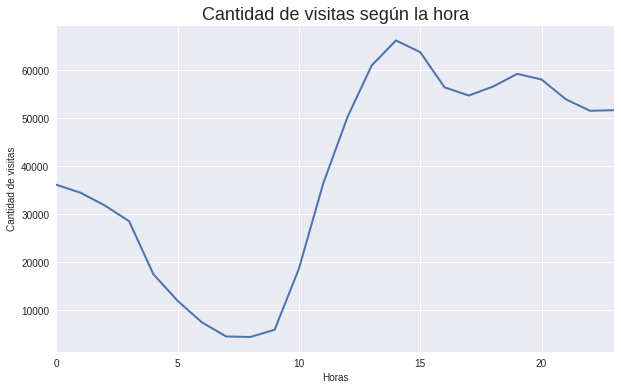

In [21]:
vistasFebreroPorHora=vistasFebrero

top_vistas = vistasFebreroPorHora.groupby('Hora').count().loc[:,'idAviso'].plot(linewidth=2,figsize=(10,6));

top_vistas.set_title("Cantidad de visitas según la hora", fontsize=18)
top_vistas.set_ylabel("Cantidad de visitas", fontsize=10)
top_vistas.set_xlabel("Horas", fontsize=10)

**_2.Día de la semana con mayor y menor cantidad de visitas_**
==============================================================

In [23]:
vistasFebreroPorDia=vistasFebrero

grouped = vistasFebreroPorDia.loc[:,['Dia','idAviso']].groupby('Dia').agg(['count'])
top_vistas = grouped[('idAviso','count')].sort_values(ascending=True)
top_vistas

Dia
Friday        47236
Sunday        90646
Saturday      95930
Wednesday    227160
Monday       227957
Tuesday      232145
Name: (idAviso, count), dtype: int64

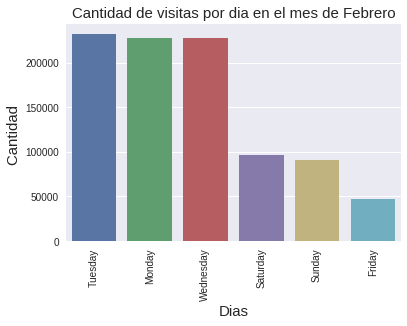

In [24]:
visualizacionVistasPorDia=vistasFebrero

g = sns.countplot(x='Dia', data=visualizacionVistasPorDia, order=visualizacionVistasPorDia['Dia'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dias", fontsize=15)
g.set_ylabel("Cantidad ", fontsize=15)
g.set_title("Cantidad de visitas por dia en el mes de Febrero", fontsize=15)

**_3.Empresas con mayor y menor cantidad de postulaciones_**
==============================================================

In [25]:
dataframe2= pd.merge(avisos,postulaciones, on='idaviso', how='inner')
empresas=dataframe2[['idaviso','denominacion_empresa']]
empresas.dropna(subset=['denominacion_empresa'],inplace=True)
empresas.isnull().sum()

idaviso                 0
denominacion_empresa    0
dtype: int64

In [26]:
grouped = empresas.loc[:,['denominacion_empresa','idaviso']].groupby('denominacion_empresa').agg(['count'])
top10_empresas = grouped[('idaviso','count')].sort_values(ascending=False)
top10_empresas.head(10)

denominacion_empresa
Manpower                              119013
RANDSTAD                              102640
Grupo Gestión                          89950
Adecco -Región Office                  83530
Assistem                               68125
Farmacity                              57583
BAYTON                                 55048
BBVA Francés                           54805
Pullmen Servicios Empresarios S.A.     51471
Adecco - Región NORTE & OESTE GBA      45912
Name: (idaviso, count), dtype: int64

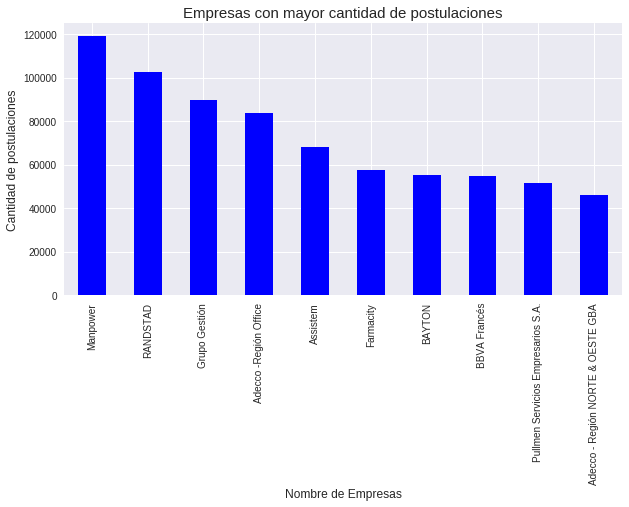

In [27]:
empresas.groupby('denominacion_empresa')['idaviso'].count().sort_values(ascending = False)[0:10].plot(kind='bar',rot = 90,figsize=(10,5),color='blue',fontsize=10)

plt.title('Empresas con mayor cantidad de postulaciones', fontsize=15);
plt.xlabel('Nombre de Empresas', fontsize=12);
plt.ylabel('Cantidad de postulaciones', fontsize=12);

 **_4. Las 10 mejores areas que tienen la mayor cantidad de publicacion en ofertas laborales_**
 ==========================================================================================

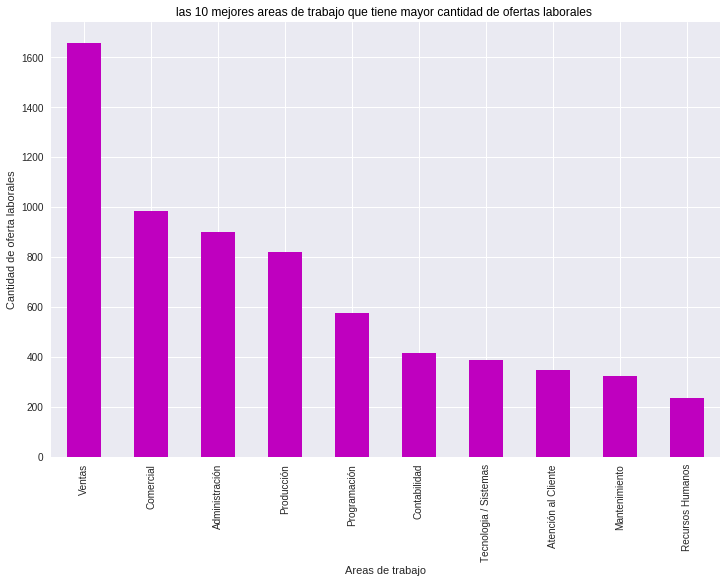

In [32]:
f = plt.figure()
avisos_areaTrabajo=avisos[['idaviso','nombre_area']]
grafhist = avisos_areaTrabajo['nombre_area'].value_counts().sort_values(ascending=False).head(10)
#grafhist
plt.title('las 10 mejores areas de trabajo que tiene mayor cantidad de ofertas laborales ', color='black')

ax=grafhist.plot(kind='bar',rot=90,figsize=(12,8),color='m');
ax.set_ylabel('Cantidad de oferta laborales');
ax.set_xlabel('Areas de trabajo');

**5. Las 10 mejores areas que tienen mayor postulación**
=====================================================

In [33]:
#verificamos que no existe ningun tipo de nan's
agrup_postulaciones=postulaciones [['idaviso','idpostulante']]
aviso_cant=agrup_postulaciones.groupby(['idaviso']).count().sort_values(by=['idpostulante'],ascending=False).reset_index()
aviso_cant.rename(columns={'idpostulante':'cantPostulantes'},inplace=True)
aviso_cant.head(10)

,idaviso,cantPostulantes
0,1112033906,9932
1,1112334791,9787
2,1112204682,9244
3,1112094756,8763
4,1112345900,8304
5,1112319451,8025
6,1112298966,7637
7,1112262494,7541
8,1112305277,7153
9,1112296264,6968


In [34]:
aviso_cant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12692 entries, 0 to 12691
Data columns (total 2 columns):
idaviso            12692 non-null int64
cantPostulantes    12692 non-null int64
dtypes: int64(2)
memory usage: 198.4 KB


In [35]:
aviso_area=avisos[['idaviso','nombre_area']]
aviso_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13849 entries, 0 to 13848
Data columns (total 2 columns):
idaviso        13849 non-null int64
nombre_area    13534 non-null object
dtypes: int64(1), object(1)
memory usage: 324.6+ KB


In [36]:
#eliminar los null 
aviso_area.dropna(inplace=True)
aviso_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13534 entries, 0 to 13848
Data columns (total 2 columns):
idaviso        13534 non-null int64
nombre_area    13534 non-null object
dtypes: int64(1), object(1)
memory usage: 317.2+ KB


In [37]:
result = pd.merge(aviso_cant,aviso_area,on='idaviso',how='outer')
#quedo con las columnas de cantPostulantes y nombre_area
postulantes_area=result[['cantPostulantes','nombre_area']]  
postulantes_area=postulantes_area.groupby('nombre_area').\
                   agg([np.sum]).sort_values(('cantPostulantes','sum'),ascending=False)[:10]

postulantes_area

,cantPostulantes
,sum
nombre_area,
Ventas,408148.0
Administración,291135.0
Producción,277089.0
Comercial,216677.0
Atención al Cliente,195636.0
Recepcionista,137485.0
Call Center,126430.0
Telemarketing,87506.0


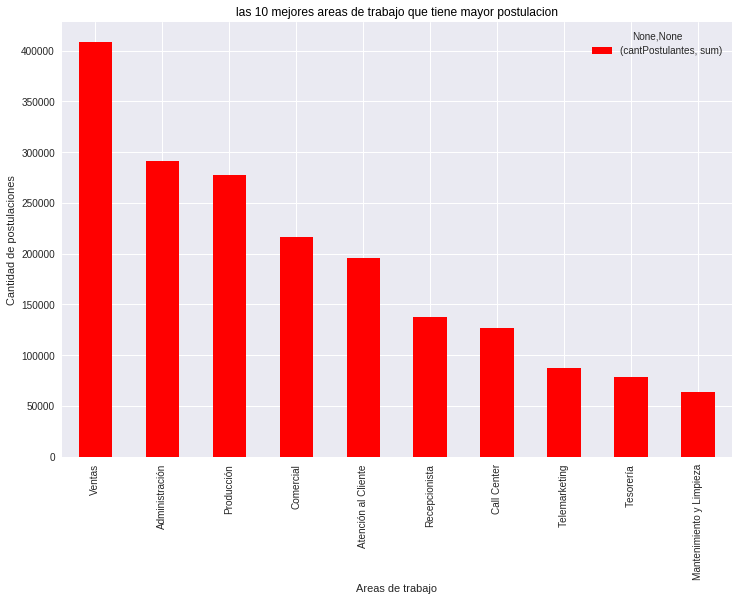

In [38]:
f= plt.figure()
graf = postulantes_area

ax=graf.plot(kind='bar',rot=90,figsize=(12,8),color='r');
ax.set_ylabel('Cantidad de postulaciones');
ax.set_xlabel('Areas de trabajo');
ax.set_title('las 10 mejores areas de trabajo que tiene mayor postulacion', color='black')
plt.show()

**6. Genero de los postulantes para las distintas areas**
=======================================================

In [39]:
postulantesGeneroYEdad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [55]:
# me quedo con los id de los postulantes con sus respectivos generos 
postulante_genero=postulantesGeneroYEdad[['idpostulante','sexo']]
postulante_aviso=postulaciones[['idaviso','idpostulante']]
aviso_area=avisos[['idaviso','nombre_area']]

In [56]:
agrupando_aviso= pd.merge(aviso_area,postulante_aviso,on='idaviso',how='outer')
agrupando_aviso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403927 entries, 0 to 3403926
Data columns (total 3 columns):
idaviso         int64
nombre_area     object
idpostulante    object
dtypes: int64(1), object(2)
memory usage: 103.9+ MB


In [57]:
agrupando_postulante=pd.merge(agrupando_aviso,postulante_genero,on='idpostulante',how='outer')
agrupando_postulante.tail()

,idaviso,nombre_area,idpostulante,sexo
3403922,1112308336,Ingeniería de Producto,NzNaAll,MASC
3403923,1112250944,Mantenimiento,NzNaAll,MASC
3403924,1112261261,Mantenimiento,NzNaAll,MASC
3403925,1112268019,Producción,NzNaAll,MASC
3403926,1112310594,NaN,NzNaAll,MASC


In [58]:
agrupando_genero=agrupando_postulante[['nombre_area','sexo']]
agrupando_genero.dropna(inplace=True)
agrupando_genero.tail()

,nombre_area,sexo
3403921,Mineria/Petroleo/Gas,MASC
3403922,Ingeniería de Producto,MASC
3403923,Mantenimiento,MASC
3403924,Mantenimiento,MASC
3403925,Producción,MASC


In [59]:
grupArea_genero=agrupando_genero
grupArea_genero['pivot']=1
grupArea_genero.tail()

,nombre_area,sexo,pivot
3403921,Mineria/Petroleo/Gas,MASC,1
3403922,Ingeniería de Producto,MASC,1
3403923,Mantenimiento,MASC,1
3403924,Mantenimiento,MASC,1
3403925,Producción,MASC,1


* Armo una tabla con los nombre de area y sus respectivos genero(femenino masculino y no_declara)

In [60]:
grupArea_genero=grupArea_genero.pivot_table(values='pivot',index='nombre_area',columns='sexo',aggfunc=np.sum)
grupArea_genero=grupArea_genero.sort_values(by=['FEM','MASC','NO_DECLARA'],ascending=False)[:20]
grupArea_genero

sexo,FEM,MASC,NO_DECLARA
nombre_area,,,
Ventas,229674.0,172813.0,5661.0
Administración,170082.0,118377.0,2676.0
Recepcionista,125446.0,10716.0,1323.0
Atención al Cliente,120674.0,72786.0,2176.0
Comercial,111656.0,102438.0,2583.0
Call Center,84383.0,40505.0,1542.0
Telemarketing,55845.0,30455.0,1206.0
Tesorería,47126.0,30394.0,930.0
Producción,45077.0,227363.0,4649.0


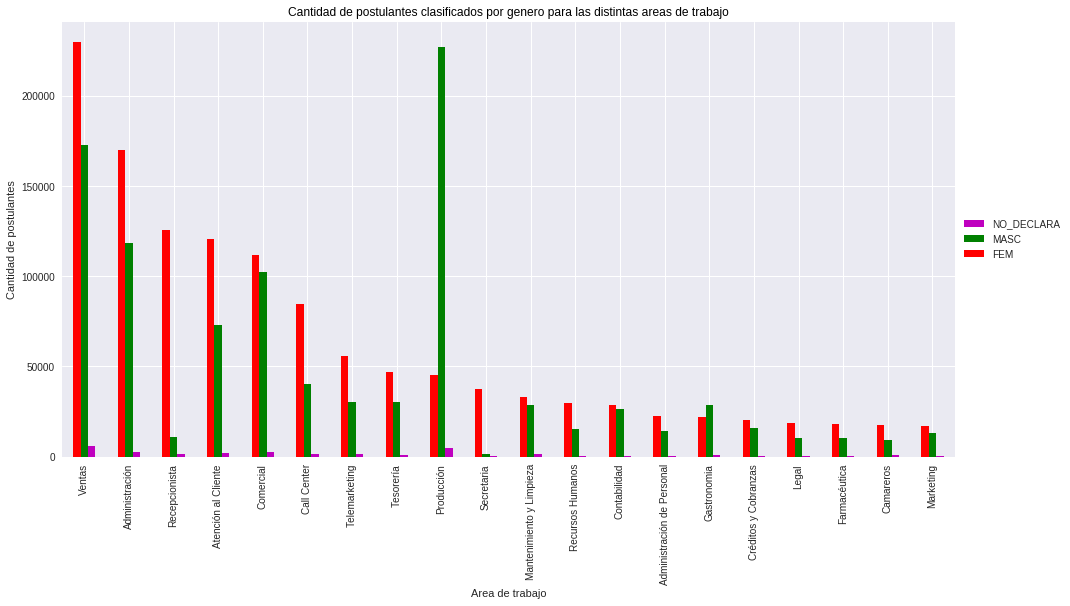

In [61]:
f = plt.figure()

ax = grupArea_genero.plot(kind='bar', stacked=False,figsize=(16,8),ax=f.gca(), color=['r','g','m'])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Cantidad de postulantes');
ax.set_xlabel('Area de trabajo');
ax.set_title('Cantidad de postulantes clasificados por genero para las distintas areas de trabajo', color='black')
plt.show()

**7. Postulaciones por cada dia de la semana durante ENERO y FEBRERO**
===================================================================

In [62]:
grup_postulaciones=postulaciones
grup_postulaciones['fechapostulacion']=pd.to_datetime(grup_postulaciones['fechapostulacion'],errors='coerce')
grup_postulaciones['Year']=grup_postulaciones['fechapostulacion'].map(lambda x:x.year)
grup_postulaciones['Year']=grup_postulaciones['Year'].fillna(0).astype(int)
grup_postulaciones['Month']=grup_postulaciones['fechapostulacion'].map(lambda y:y.month)
grup_postulaciones['Month']=grup_postulaciones['Month'].fillna(0).astype(int)
grup_postulaciones['Day']=grup_postulaciones['fechapostulacion'].map(lambda z:z.day)
grup_postulaciones['Day']=grup_postulaciones['Day'].fillna(0).astype(int)
grup_postulaciones

,idaviso,idpostulante,fechapostulacion,Year,Month,Day
0,1112257047,NM5M,2018-01-15 16:22:34,2018,1,15
1,1111920714,NM5M,2018-02-06 09:04:50,2018,2,6
2,1112346945,NM5M,2018-02-22 09:04:47,2018,2,22
3,1112345547,NM5M,2018-02-22 09:04:59,2018,2,22
4,1112237522,5awk,2018-01-25 18:55:03,2018,1,25
5,1112277633,5awk,2018-01-29 13:34:44,2018,1,29
6,1112302347,5awk,2018-02-07 20:49:22,2018,2,7
7,1112291495,5awk,2018-02-07 20:50:13,2018,2,7
8,1112304011,5awk,2018-02-07 20:51:15,2018,2,7
9,1112326289,5awk,2018-02-09 20:24:57,2018,2,9


In [63]:
grup_postulaciones.Month.unique()

array([1, 2])

In [64]:
grup_postulaciones.Year.unique()

array([2018])

In [65]:
# cambiamos los numeros de dias por el nombre del día que le corresponde
import datetime, locale
locale.setlocale(locale.LC_ALL, '')
grup_postulaciones['Day of week']=grup_postulaciones['fechapostulacion'].dt.strftime("%A")
grup_postulaciones

,idaviso,idpostulante,fechapostulacion,Year,Month,Day,Day of week
0,1112257047,NM5M,2018-01-15 16:22:34,2018,1,15,lunes
1,1111920714,NM5M,2018-02-06 09:04:50,2018,2,6,martes
2,1112346945,NM5M,2018-02-22 09:04:47,2018,2,22,jueves
3,1112345547,NM5M,2018-02-22 09:04:59,2018,2,22,jueves
4,1112237522,5awk,2018-01-25 18:55:03,2018,1,25,jueves
5,1112277633,5awk,2018-01-29 13:34:44,2018,1,29,lunes
6,1112302347,5awk,2018-02-07 20:49:22,2018,2,7,miércoles
7,1112291495,5awk,2018-02-07 20:50:13,2018,2,7,miércoles
8,1112304011,5awk,2018-02-07 20:51:15,2018,2,7,miércoles
9,1112326289,5awk,2018-02-09 20:24:57,2018,2,9,viernes


In [66]:
# me quedo con la columna idpostulante, mes, año y dia
selecc_postulaciones=grup_postulaciones[['idpostulante','Month','Day of week']]
selecc_postulaciones['pivot']=1
selecc_postulaciones

,idpostulante,Month,Day of week,pivot
0,NM5M,1,lunes,1
1,NM5M,2,martes,1
2,NM5M,2,jueves,1
3,NM5M,2,jueves,1
4,5awk,1,jueves,1
5,5awk,1,lunes,1
6,5awk,2,miércoles,1
7,5awk,2,miércoles,1
8,5awk,2,miércoles,1
9,5awk,2,viernes,1


In [67]:
selecc_postulaciones=selecc_postulaciones.pivot_table(values='pivot',index='Day of week',columns='Month',aggfunc=np.sum)
selecc_postulaciones.columns=['ENERO','FEBRERO']
selecc_postulaciones

,ENERO,FEBRERO
Day of week,,
domingo,70437,156420
jueves,161108,345055
lunes,283169,385141
martes,275708,382720
miércoles,275497,402339
sábado,68344,148987
viernes,141935,304763


In [68]:
sorter = ['domingo', 'lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'domingo': 0,
 'jueves': 4,
 'lunes': 1,
 'martes': 2,
 'miércoles': 3,
 'sábado': 6,
 'viernes': 5}

In [69]:
selecc_postulaciones['Day_id'] = selecc_postulaciones.index
selecc_postulaciones['Day_id'] = selecc_postulaciones['Day_id'].map(sorterIndex)
selecc_postulaciones=selecc_postulaciones.sort_values(by=['Day_id'],ascending=True)
selecc_postulaciones


,ENERO,FEBRERO,Day_id
Day of week,,,
domingo,70437,156420,0
lunes,283169,385141,1
martes,275708,382720,2
miércoles,275497,402339,3
jueves,161108,345055,4
viernes,141935,304763,5
sábado,68344,148987,6


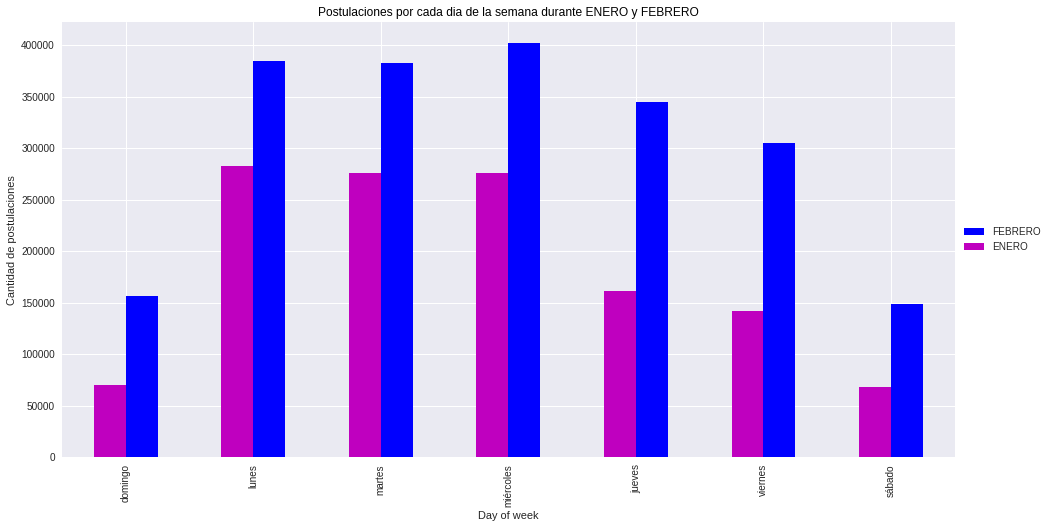

In [70]:
#elimino la columna day_id 
selecc_postulaciones=selecc_postulaciones[['ENERO','FEBRERO' ]]
f = plt.figure()
plt.title('Postulaciones por cada dia de la semana durante ENERO y FEBRERO', color='black')
ax = selecc_postulaciones.plot(kind='bar', stacked=False,figsize=(16,8),ax=f.gca(),color=['m','b'])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Cantidad de postulaciones');
ax.set_xlabel('Day of week');
plt.show()

**_8. grafico boxplot de visitas dia por hora_**
===================================================

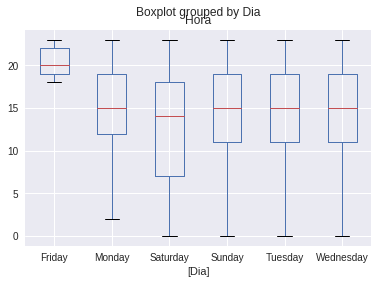

In [72]:
visi3=vistasFebrero[['Dia','Hora']]
visi3.boxplot(by='Dia')

## **Conclusión**:
###  Vemos que la mediana en horas los viernes es de 20 hrs, mientras que los otros dias es 15 hrs(excepto el sabado) vemos que en el sabado la  parte baja de la caja es mayor que la de arriba; ello quiere decir que las horas  comprendidas entre el 25% y el 50% de ese dia está más dispersa que entre el 50% y el 75%,idem con el viernes, y en los demas la mediana esta en el centro y es simetrica la distribucion de horas


**9. Hora en el dia que mas se postulan**
==========================================

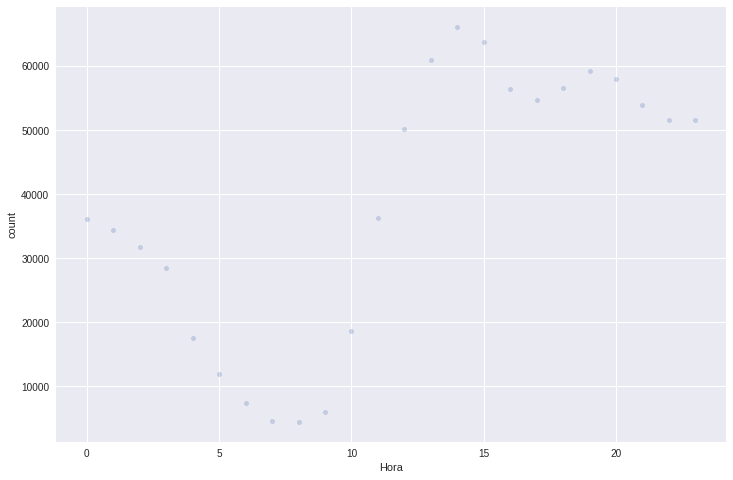

In [74]:
visualizacionvistasporhora=visualizacionVistasPorDia.groupby('Hora')['idpostulante'].agg(['count']).reset_index()

visualizacionvistasporhora.plot.scatter('Hora','count',alpha=0.25,figsize=(12,8));

## **Conclusión:**
## Alcanza un pico en las 15 horas, mientras que entre las 5 y 10 horas son las que menos se postulan.